In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

#  Matches data

In [3]:
df = pd.read_csv('all_t20_world_cup_matches_results.csv')
df.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match
0,India,Pakistan,India,5 runs,Johannesburg,2007/09/24,T20I # 46
1,Australia,India,India,15 runs,Durban,2007/09/22,T20I # 45
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007/09/22,T20I # 44
3,South Africa,India,India,37 runs,Durban,2007/09/20,T20I # 43
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007/09/20,T20I # 42


# 1.How big is your data


In [5]:
df.shape

(317, 7)

# 2.What is the datatype of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team1           317 non-null    object
 1   Team2           317 non-null    object
 2   Winner          317 non-null    object
 3   Margin          317 non-null    object
 4   Ground          317 non-null    object
 5   Match Date      317 non-null    object
 6   T-20 Int Match  317 non-null    object
dtypes: object(7)
memory usage: 17.5+ KB


# 3.Are there any null values?

In [9]:
df.isnull().sum()

Team1             0
Team2             0
Winner            0
Margin            0
Ground            0
Match Date        0
T-20 Int Match    0
dtype: int64

# 4.How does the data look mathematically?

In [11]:
df.describe()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match
count,317,317,317,317,317,317,317
unique,22,23,24,85,39,176,317
top,Australia,Pakistan,India,6 wickets,Bridgetown,2024/06/13,T20I # 46
freq,43,40,35,30,20,3,1


# 5.Are there any duplicate values?

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
312    False
313    False
314    False
315    False
316    False
Length: 317, dtype: bool

# 6.Countplot

<Axes: xlabel='Winner', ylabel='count'>

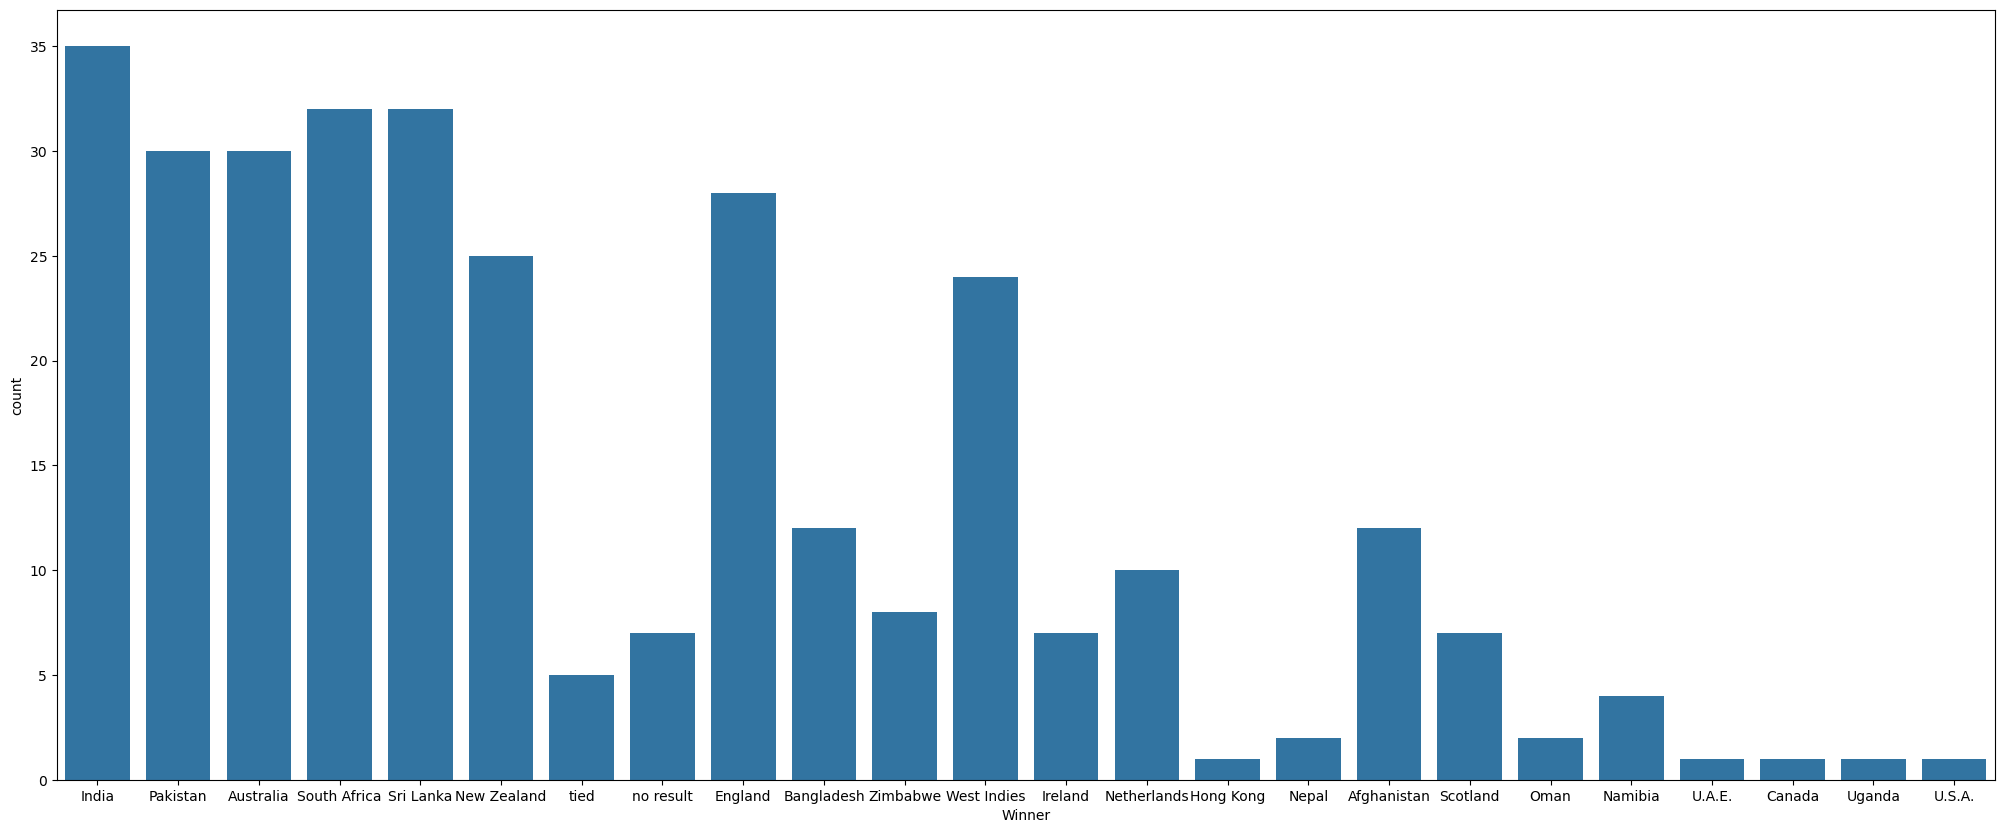

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x='Winner')


<Axes: ylabel='count'>

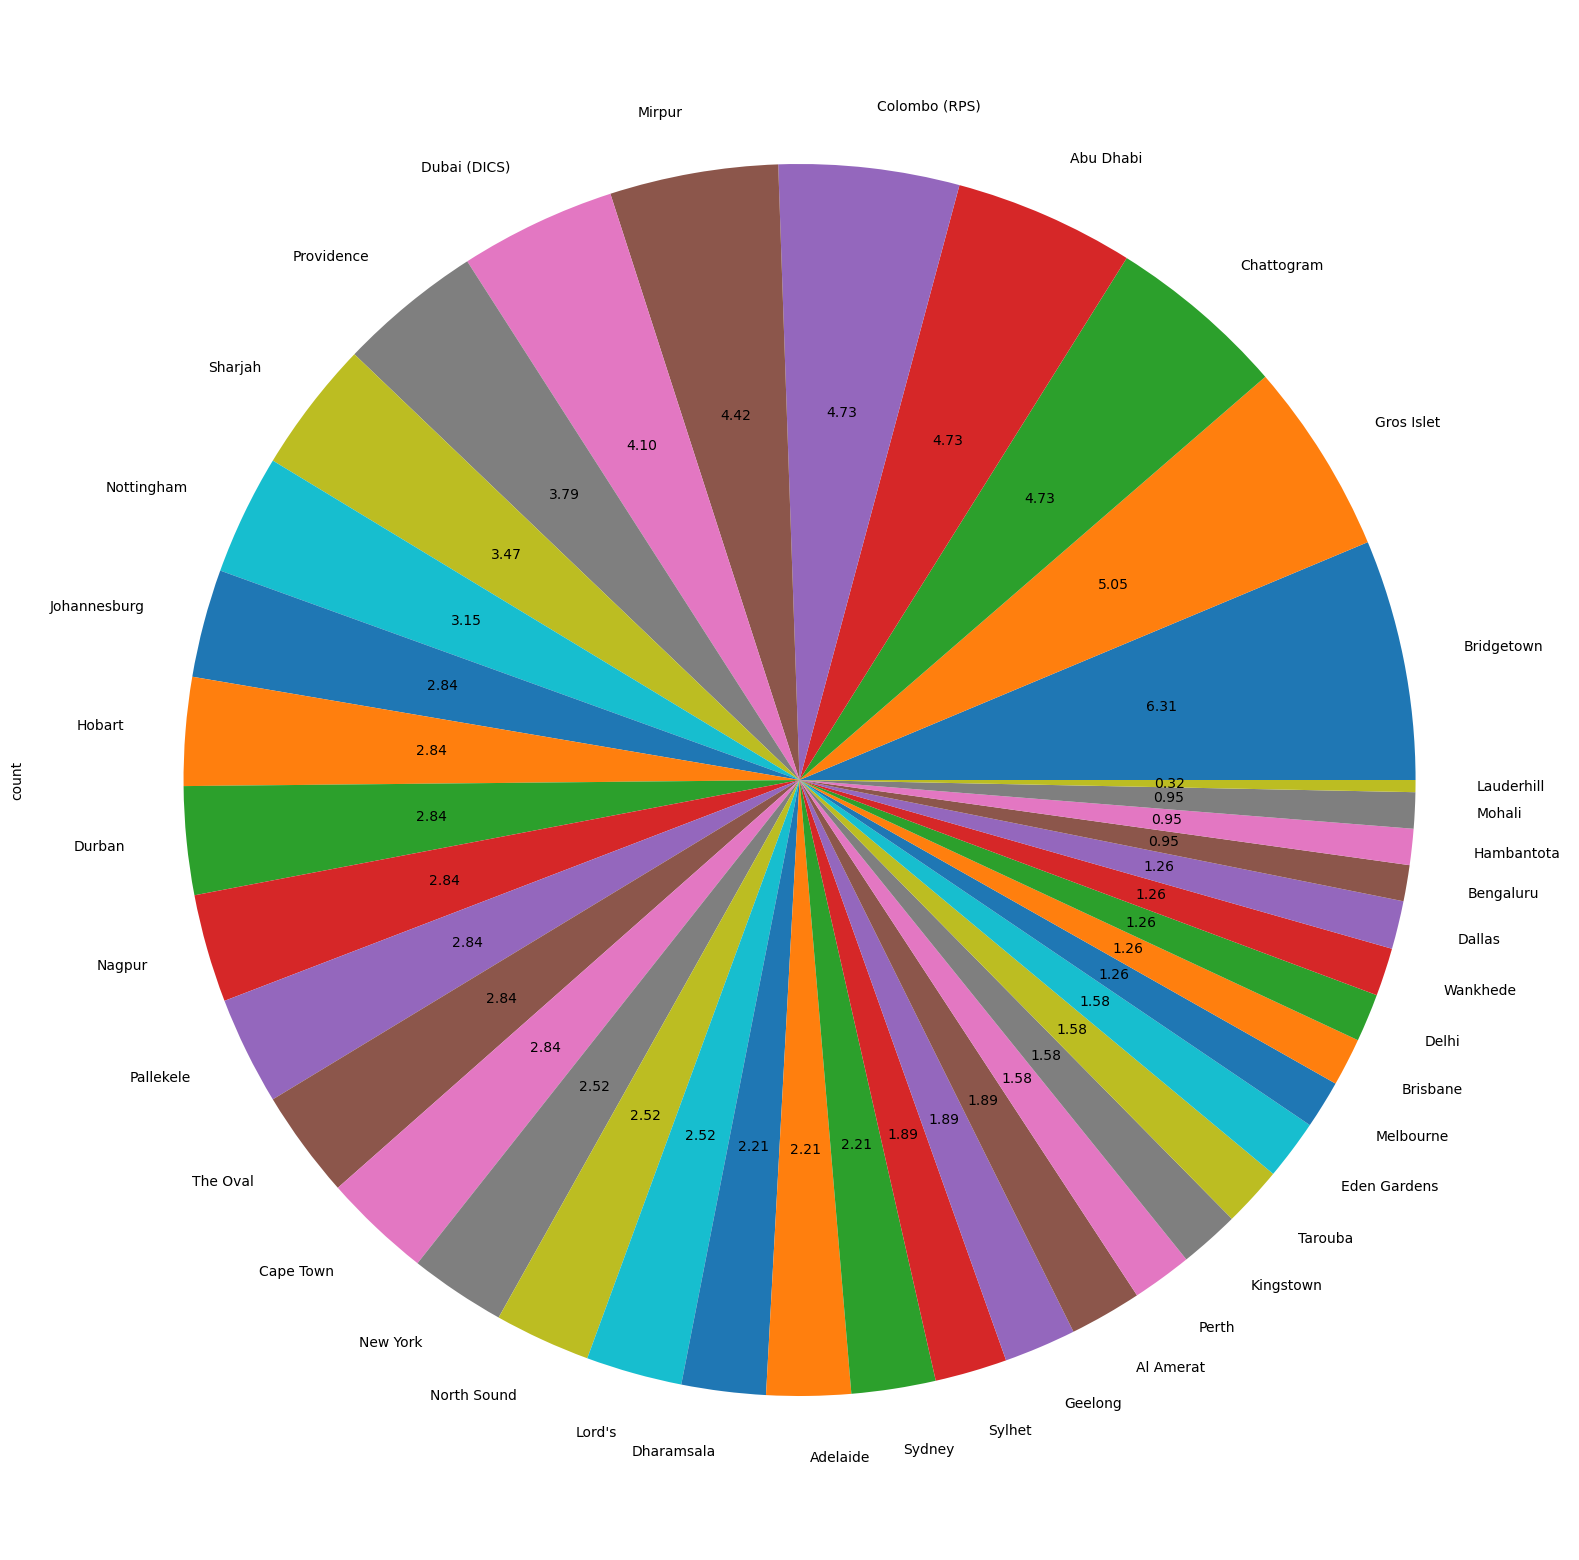

In [16]:
plt.figure(figsize=(35,20))
df['Ground'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Winner', ylabel='Team1'>

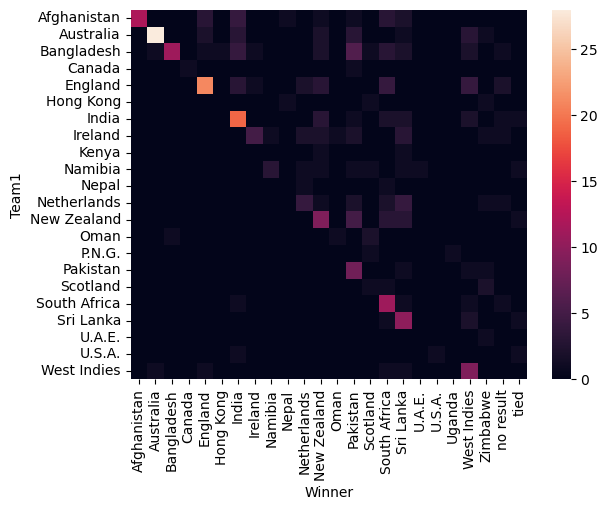

In [17]:
sns.heatmap(pd.crosstab(df['Team1'],df['Winner']))

<Axes: xlabel='Winner', ylabel='Team2'>

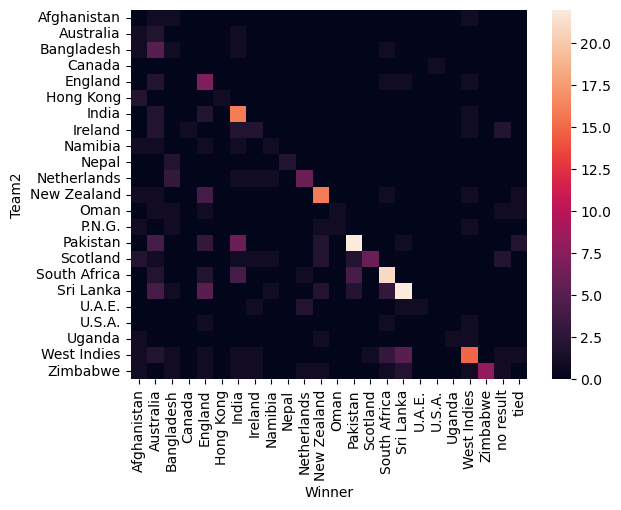

In [18]:
sns.heatmap(pd.crosstab(df['Team2'],df['Winner']))

# Players data

In [20]:
df2 = pd.read_csv('all_t20_world_cup_players_list.csv')
df2.head()

,Team,Year,Player Name
0,Afghanistan,2010,Nawroz Mangal
1,Afghanistan,2010,Asghar Afghan
2,Afghanistan,2010,Karim Sadiq
3,Afghanistan,2010,Mohammad Shahzad
4,Afghanistan,2010,Noor Ali Zadran


# 1. How big is the data

In [22]:
df2.shape

(1980, 3)

# 2. What is the datatype of columns?

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team         1980 non-null   object
 1   Year         1980 non-null   int64 
 2   Player Name  1980 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.5+ KB


# 3. Is there any null values?

In [26]:
df2.isnull().sum()

Team           0
Year           0
Player Name    0
dtype: int64

# 4. How does the data look mathematically?

In [28]:
df2.describe()

,Year
count,1980.000000
mean,2015.954545
std,5.839002
min,2007.000000
25%,2010.000000
50%,2016.000000
75%,2022.000000
max,2024.000000


# 5. Are there any duplicate values in the data?

In [30]:
df2.duplicated().sum()

0

# Plotting

# 1. Countplot

<Axes: xlabel='Year', ylabel='count'>

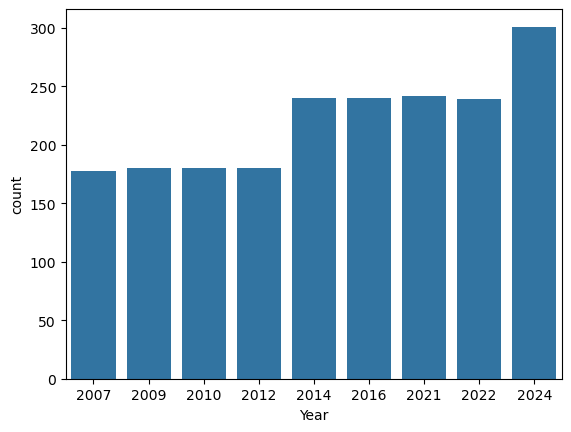

In [33]:
sns.countplot(data=df2,x='Year')

<Axes: ylabel='count'>

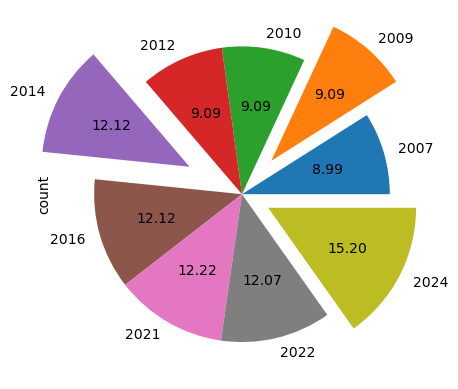

In [34]:
df2['Year'].value_counts().sort_index().plot(kind='pie',autopct='%.2f',explode=[0,0.3,0,0,0.4,0,0,0,0.2])

# Final World Cup Dataset

In [36]:
df3 = pd.read_csv('wc_final_dataset.csv')
df3.sample(5)

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
123,Bangladesh,West Indies,West Indies,73 runs,Mirpur,2014/03/25,T20I # 385,83.27,72.80,85.07,69.40,4,0,4,1,50.0
95,Sri Lanka,New Zealand,tied,-,Pallekele,2012/09/27,T20I # 275,84.47,73.60,75.67,71.60,3,0,3,0,50.0
106,Australia,Ireland,Australia,7 wickets,Colombo (RPS),2012/09/19,T20I # 264,73.47,87.80,87.40,79.00,3,0,2,0,0.0
190,Afghanistan,India,India,66 runs,Abu Dhabi,2021/11/03,T20I # 1390,85.07,84.33,83.87,86.67,4,0,6,1,0.0
10,England,New Zealand,New Zealand,5 runs,Durban,2007/09/18,T20I # 36,69.53,66.40,69.20,72.33,0,0,0,0,0.0


# 1. How big is your data

In [38]:
df3.shape

(317, 16)

# 2. what is the datatypes of columns

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team1                         317 non-null    object 
 1   Team2                         317 non-null    object 
 2   Winner                        317 non-null    object 
 3   Margin                        317 non-null    object 
 4   Ground                        317 non-null    object 
 5   Match Date                    317 non-null    object 
 6   T-20 Int Match                317 non-null    object 
 7   Team1 Avg Batting Ranking     317 non-null    float64
 8   Team2 Avg Batting Ranking     317 non-null    float64
 9   Team1 Avg Bowling Ranking     317 non-null    float64
 10  Team2 Avg Bowling Ranking     317 non-null    float64
 11  Team1 Total WCs participated  317 non-null    int64  
 12  Team1 Total WCs won           317 non-null    int64  
 13  Team2

# 3. Is there any null values in this data?

In [42]:
df3.isnull().sum()

Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
Match Date                      0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
dtype: int64

# 4. How data look mathematically?


In [44]:
df3.describe()

,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total WCs participated,Team1 Total WCs won,Team2 Total WCs participated,Team2 Total WCs won,Team1 win % over Team2
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,81.831420,81.921830,81.824669,82.948707,3.694006,0.299685,3.526814,0.331230,31.862776
std,9.521749,10.248014,9.410076,10.217811,2.612845,0.546942,2.584657,0.528375,34.688898
min,64.070000,64.930000,58.770000,63.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.730000,73.330000,75.000000,74.400000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,80.470000,80.310000,81.270000,81.600000,4.000000,0.000000,3.000000,0.000000,25.000000
75%,89.000000,90.670000,86.930000,91.730000,6.000000,1.000000,6.000000,1.000000,57.140000
max,101.000000,101.000000,101.000000,101.000000,8.000000,2.000000,8.000000,2.000000,100.000000


# 5. Are there any duplicate value in the data?

In [46]:
df3.duplicated().sum()

0

# Plotting

# 1. Lineplot(categorical-numerical)

<Axes: xlabel='Team1', ylabel='Team1 Total WCs participated'>

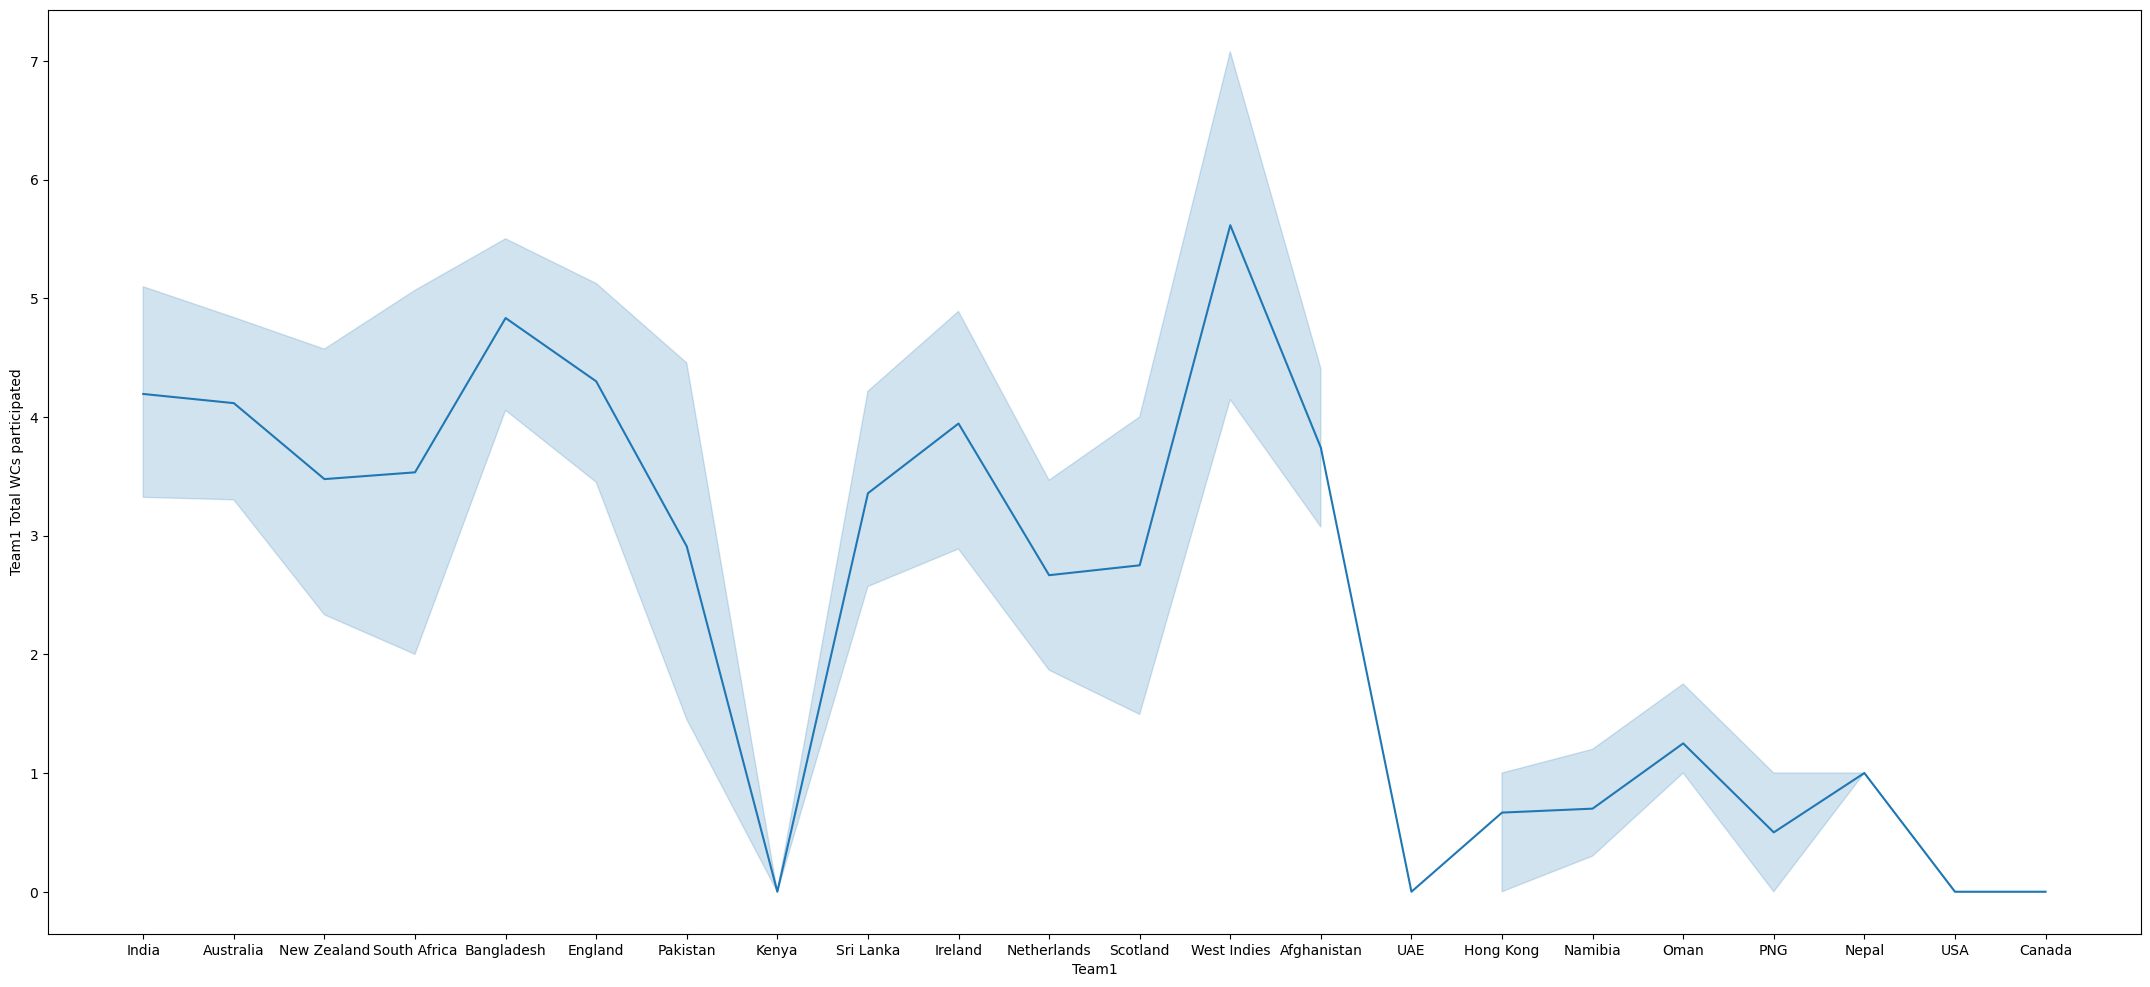

In [49]:
plt.figure(figsize=(27,12))
sns.lineplot(x=df3['Team1'],y=df3['Team1 Total WCs participated'])

<Axes: xlabel='Team2', ylabel='Team2 Total WCs participated'>

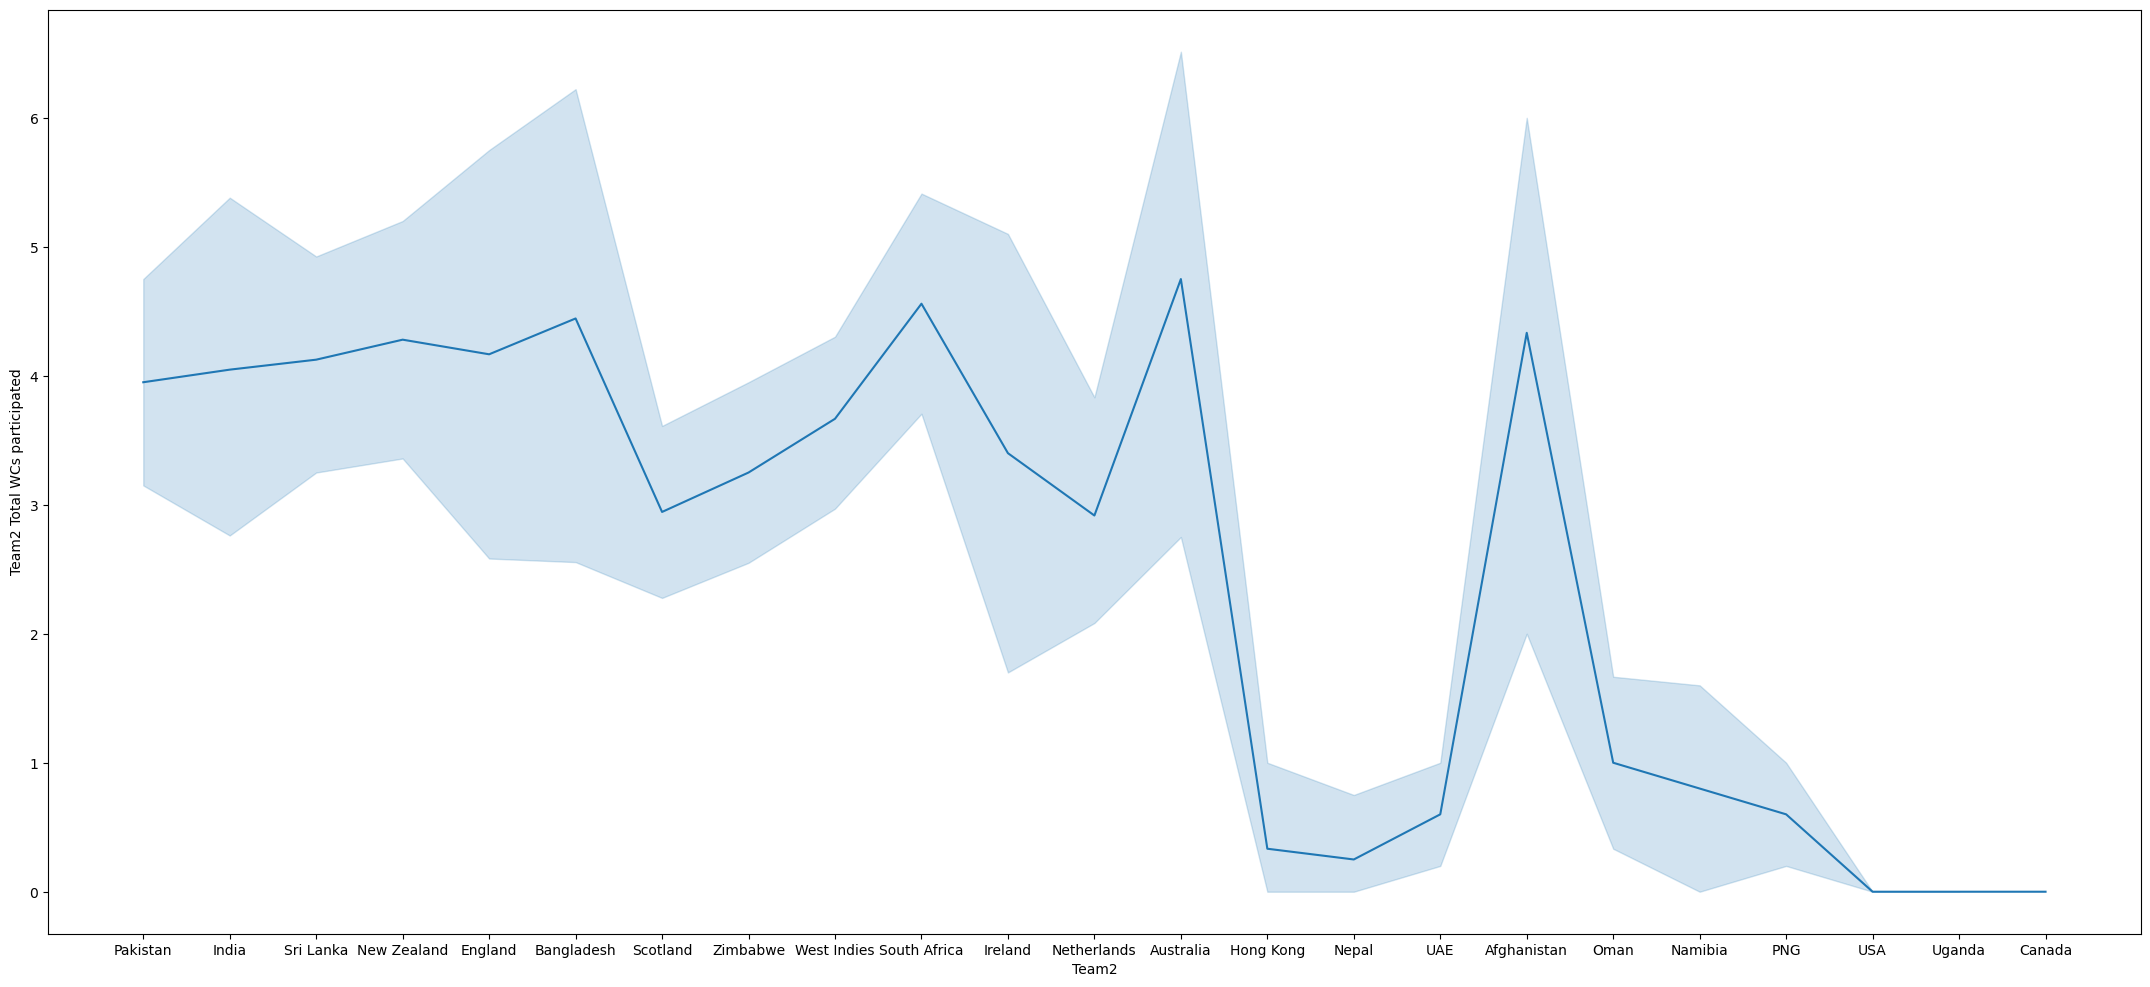

In [50]:
plt.figure(figsize=(27,12))
sns.lineplot(x=df3['Team2'],y=df3['Team2 Total WCs participated'])

# 2. Barplot(categorical-numerical)

<BarContainer object of 317 artists>

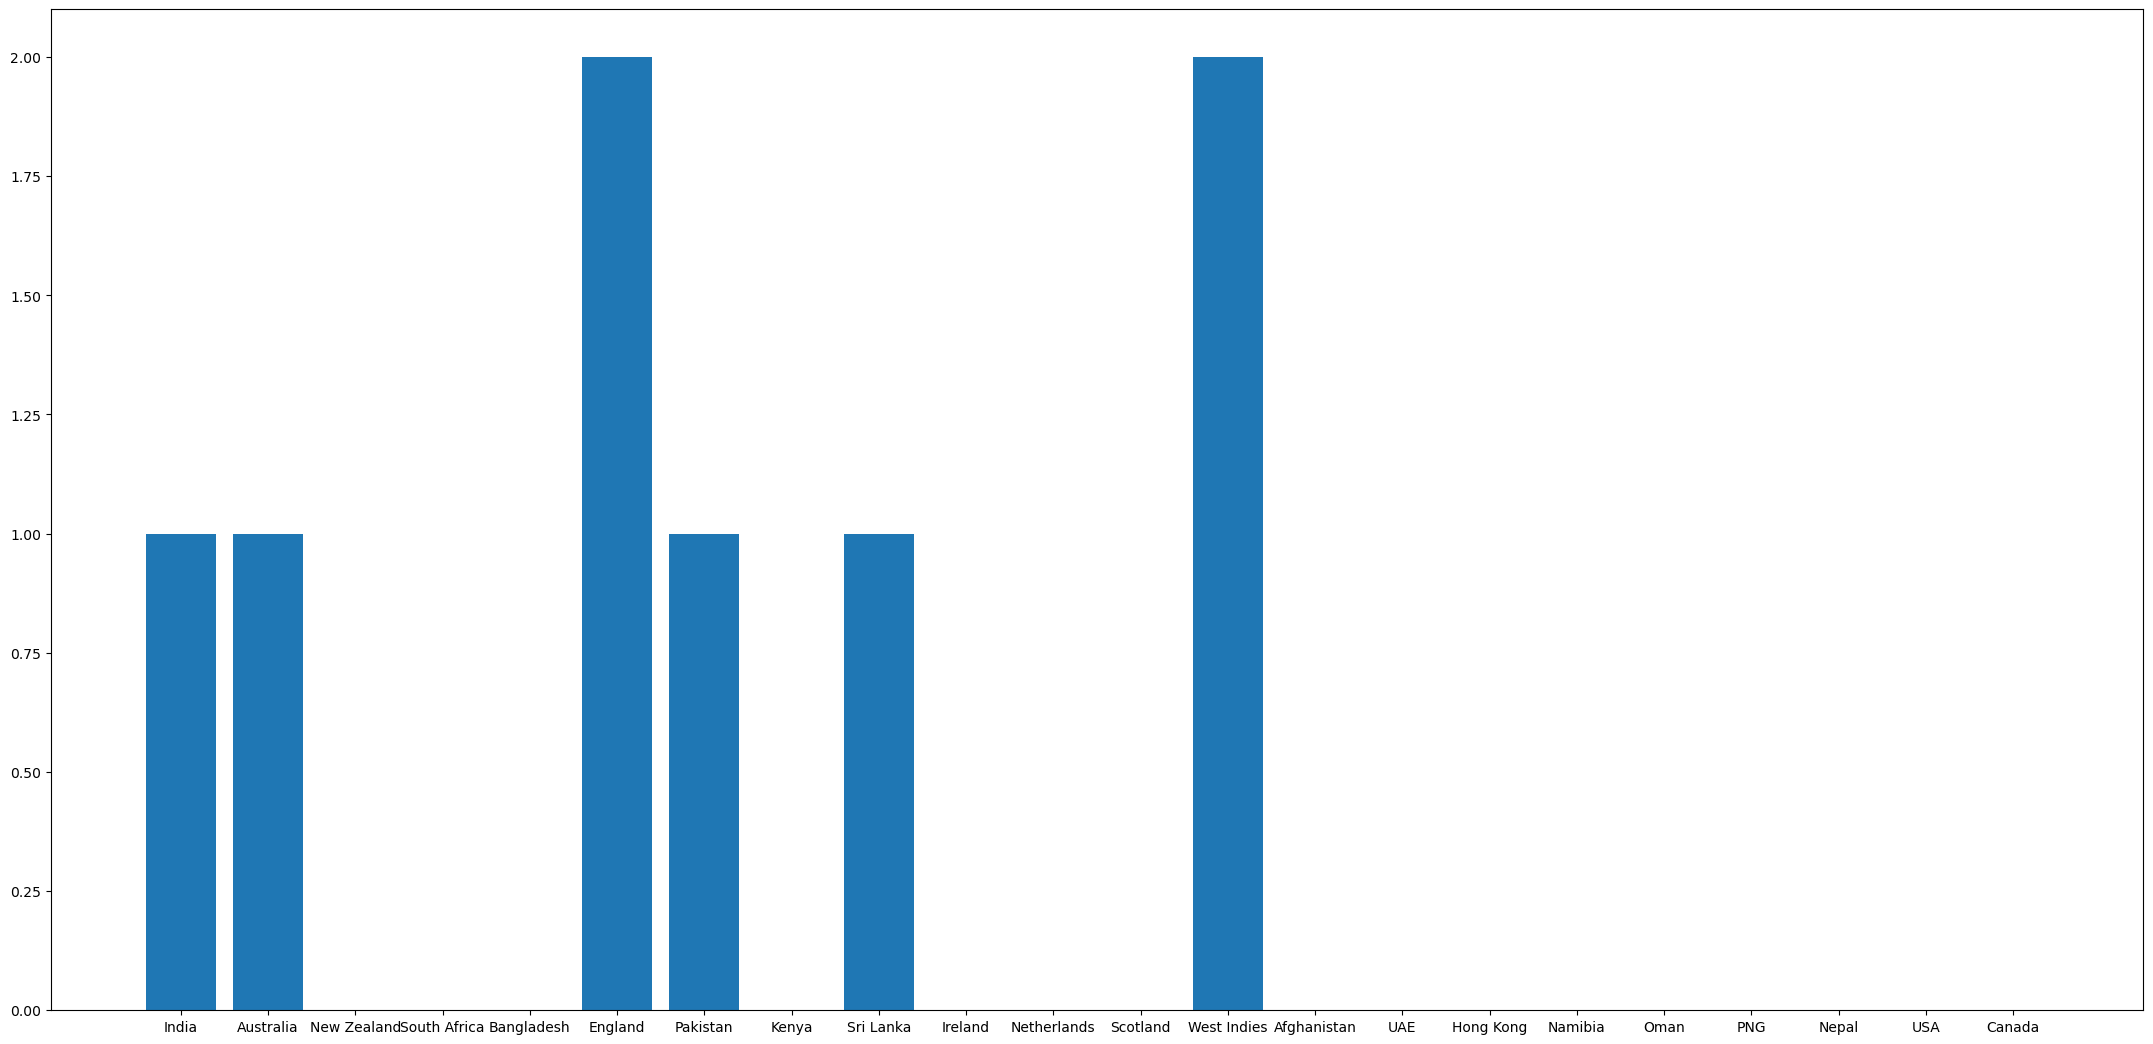

In [52]:
plt.figure(figsize=(27,13))
plt.bar(df3['Team1'],df3['Team1 Total WCs won'])

<BarContainer object of 317 artists>

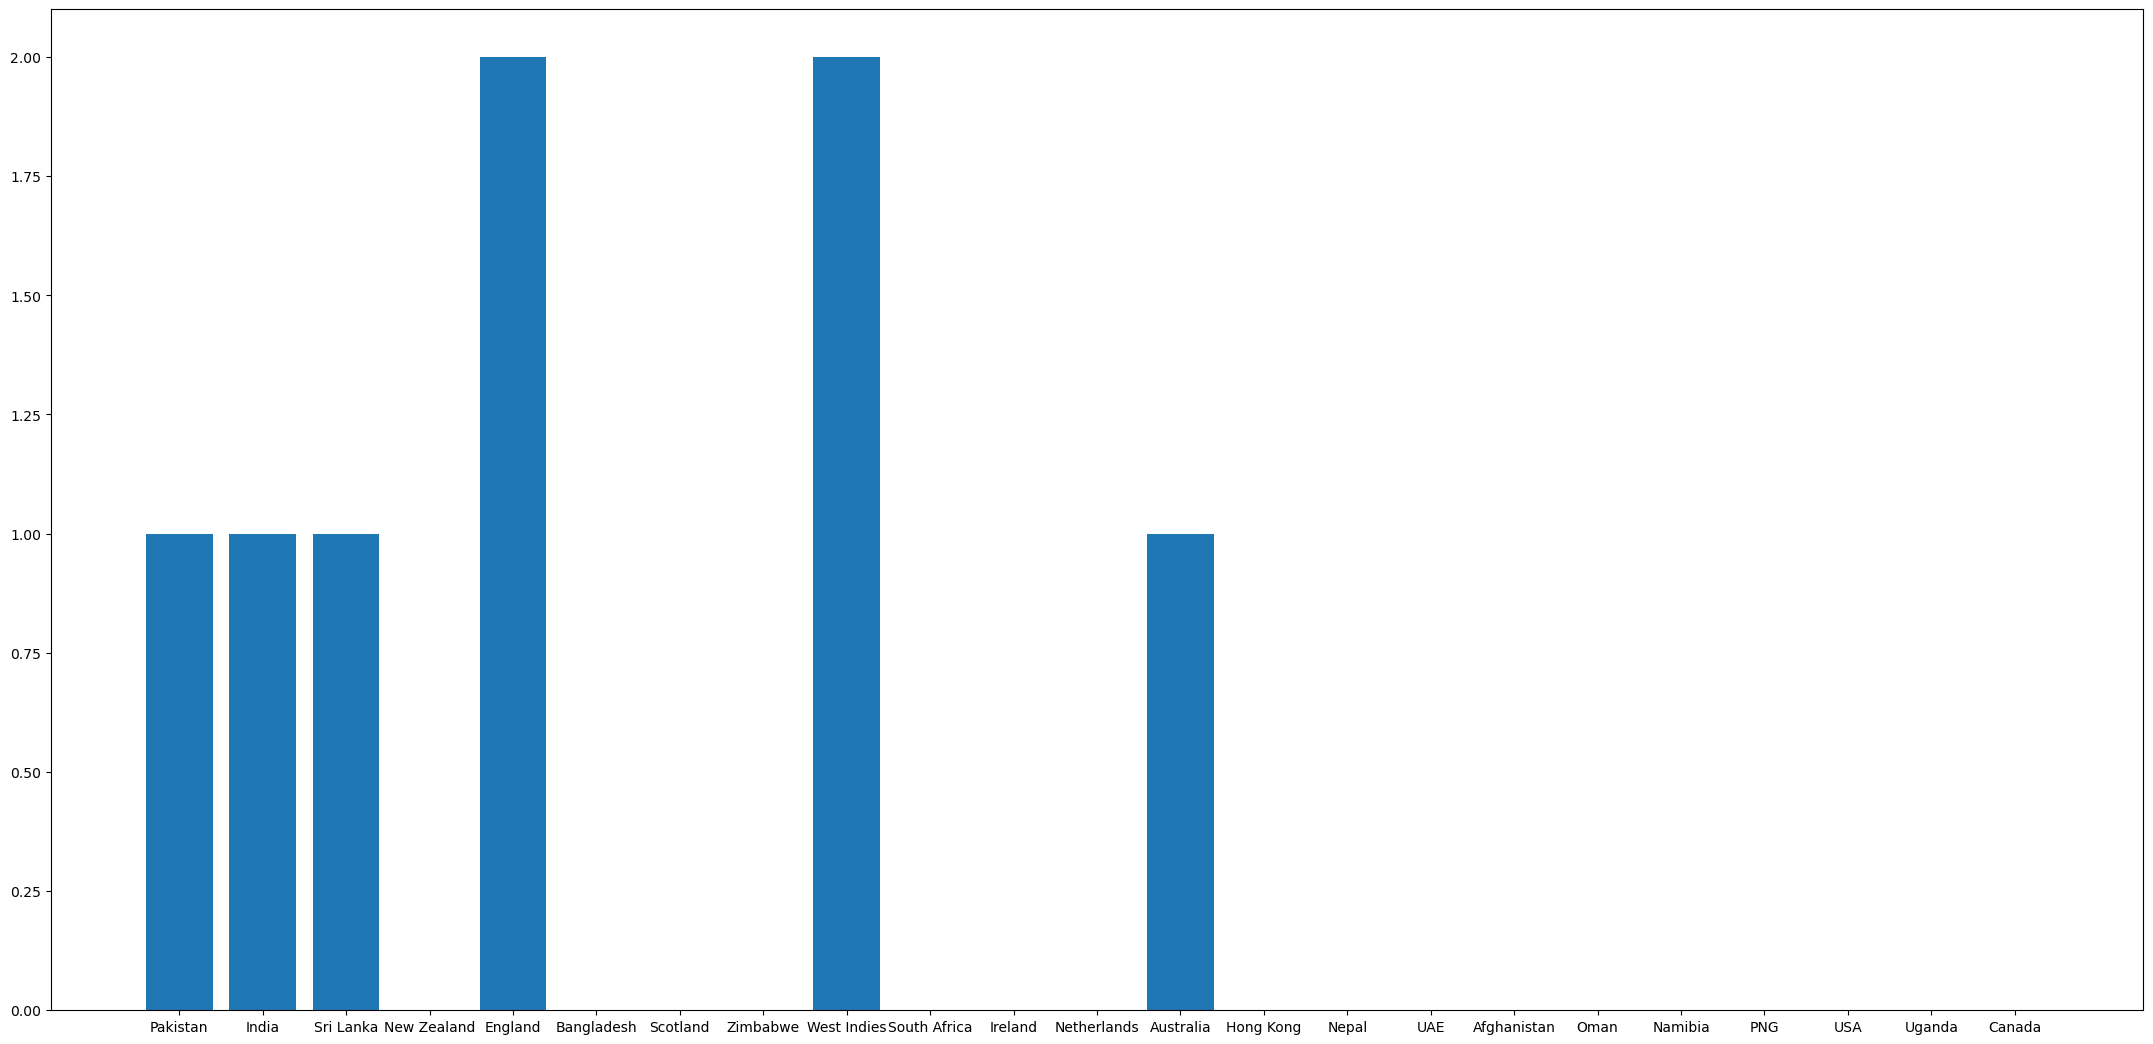

In [53]:
plt.figure(figsize=(27,13))
plt.bar(df3['Team2'],df3['Team2 Total WCs won'])

In [54]:
df4 = df3.drop(columns=['Margin','Match Date','T-20 Int Match'])

In [55]:
df5 = df3.drop(columns=['Margin','Match Date','T-20 Int Match'])

# Let's plan and do some preprocessing

In [174]:
# 3. Apply OneHotEncoding to categorical input features
df_encoded = pd.get_dummies(df4, columns=['Team1', 'Team2', 'Ground'])


In [176]:
# 4.Label Encode the target variable (Winner)
le_winner = LabelEncoder()
df_encoded['Winner'] = le_winner.fit_transform(df4['Winner'])  # Note: use df4['Winner'], not df_encoded['Winner']

In [182]:
# 5. Split into features and labels
x= df_encoded.drop('Winner', axis=1)
y = df_encoded['Winner']


# Training the model

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [187]:
rfcl = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

In [189]:
rfcl.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [191]:
y_pred = rfcl.predict(x_test)
y_pred

array([20, 20, 11, 10,  1, 15,  0, 11, 15, 13, 13,  1, 13, 21,  1, 15,  1,
       21,  0,  4, 14,  0,  1, 16,  6, 11,  1, 13,  4,  0, 20,  1, 10,  6,
       14, 13,  2,  4,  5, 14, 15,  6, 16,  6,  1,  6, 10,  2,  4,  1, 20,
       11, 11, 13,  6,  4, 16,  6, 11,  8, 16,  6, 15, 16])

In [193]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_test,y_pred)

0.609375